# **Proposta de Trabalho - Mineração de dados**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Alunos:** Raul Araju e Gabriel Lima Nunes
### **Matrícula** 2021032110 e 2021032048


### **Tema:** Precificação do Seguro de Saúde nos Estados Unidos
### **Base de dados:** https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv


**Todas as células que não possuem comentários que indiquem ter sido criadas manualmente ou alteradas, foram geradas através de iterações com o ChatGPT, com mudanças muito pequenas como nomes de variáveis.**

## **ChatGPT Links**

**Business Understanding** 

**Data Understanding:** 

**Data Preparation:** https://chat.openai.com/share/c1cf2fb1-b305-4780-a653-57d9fc22fafa

**Modeling:** 

**Evaluation:** 


In [ ]:
#Bibliotecas usadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler



# **Introdução**

# **Motivação**

# **Objetivo**

## **Geral**


## **Específicos**

# **Metodologia**

# **Desenvolvimento**


## **2. Data understanding (Entendimento dos dados)**


#### Carregar CSV

In [2]:
#Carregando a base de dados
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

#### Explorar o Dataframe


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Display basic statistics of the numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


As colunas presentes são
- age: Idade do beneficiário primário;

- sex: Gênero do contratante, masculino ou feminino;

- bmi: Indíce de Massa Corporal, idealmente entre 18.5 e 24.9;

- children: Número de crianças cobertas pelo seguro de saúde/ Número de dependentes;

- smoker: Se o beneficiário é fumante;

- region: Em que região dos Estados Unidos o beneficiário vive;

- charges: Custos médicos individuais pelo seguro de saúde;

#### Histogramas para cada coluna numérica

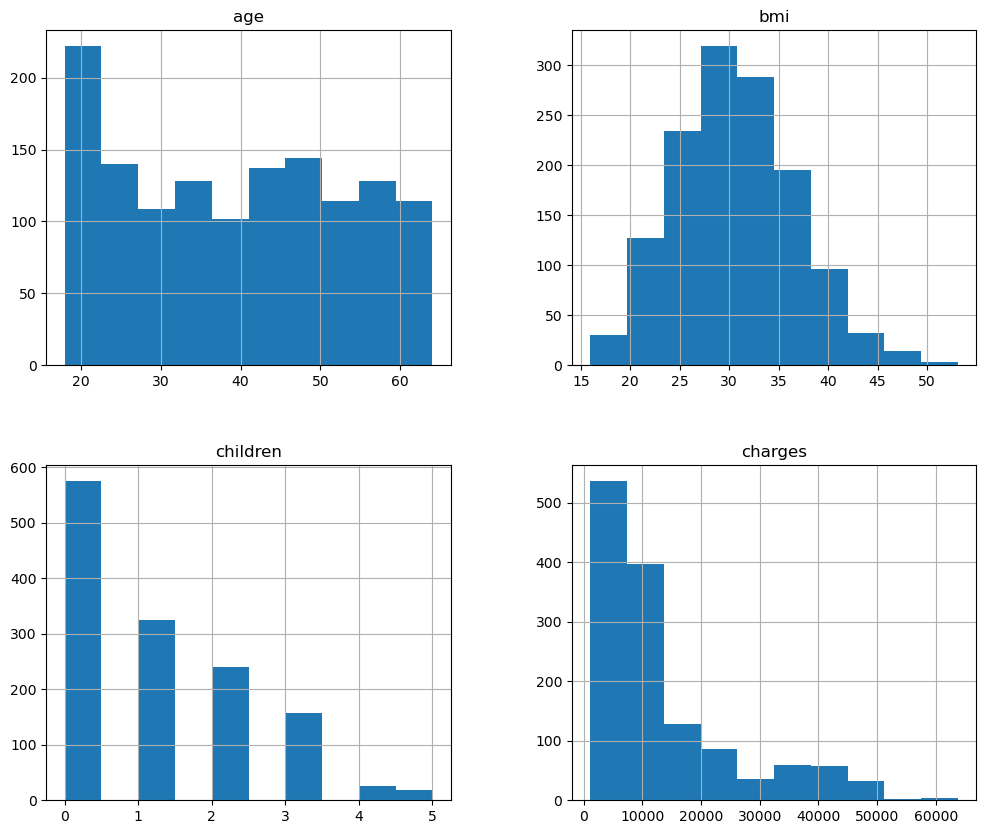

In [5]:
# Plot histograms for numerical columns
df.hist(figsize=(12, 10))
plt.show()

#### Distribuição de Colunas Binárias

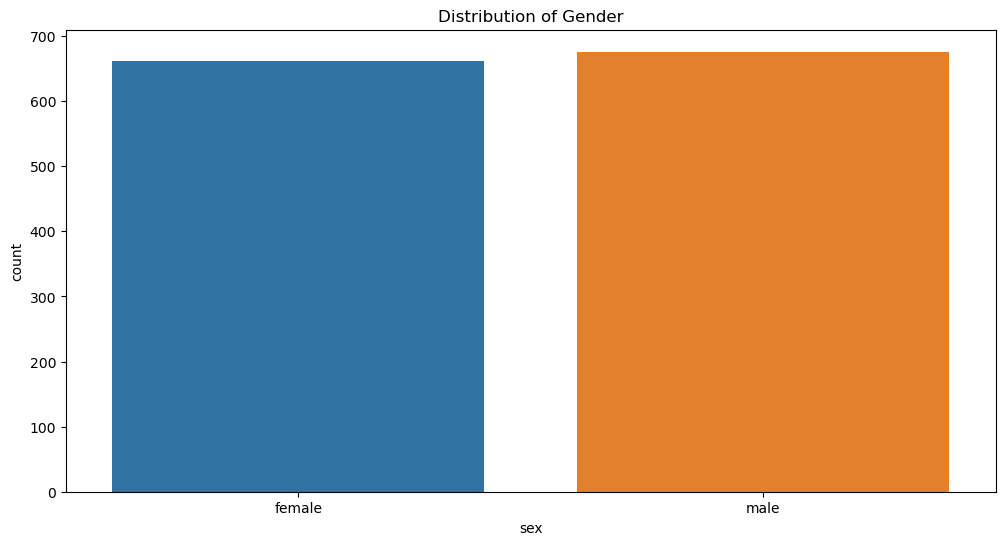

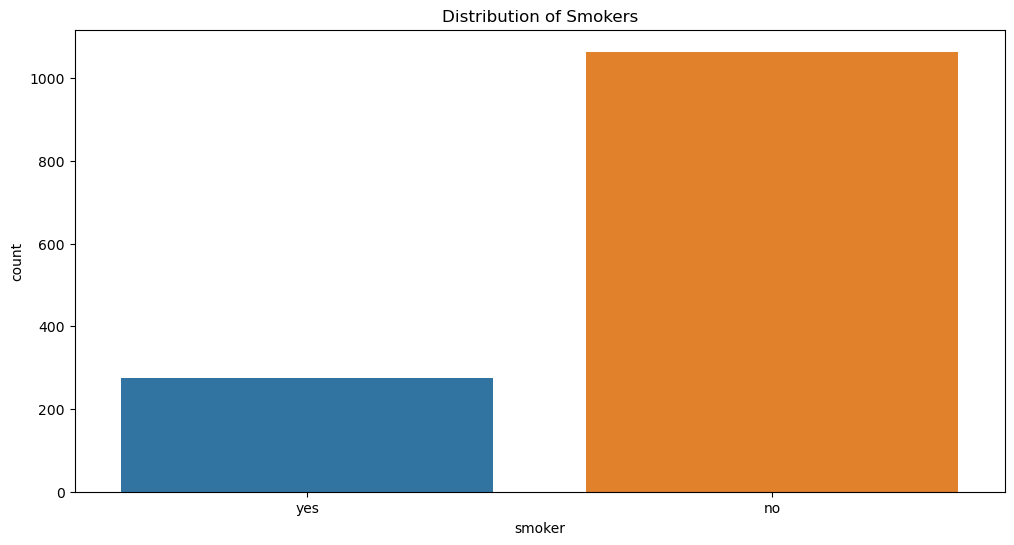

In [6]:
# Countplot for 'sex' and 'smoker'
plt.figure(figsize=(12, 6))
sns.countplot(x='sex', data=df)
plt.title('Distribution of Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='smoker', data=df)
plt.title('Distribution of Smokers')
plt.show()


#### Relação entre atributos

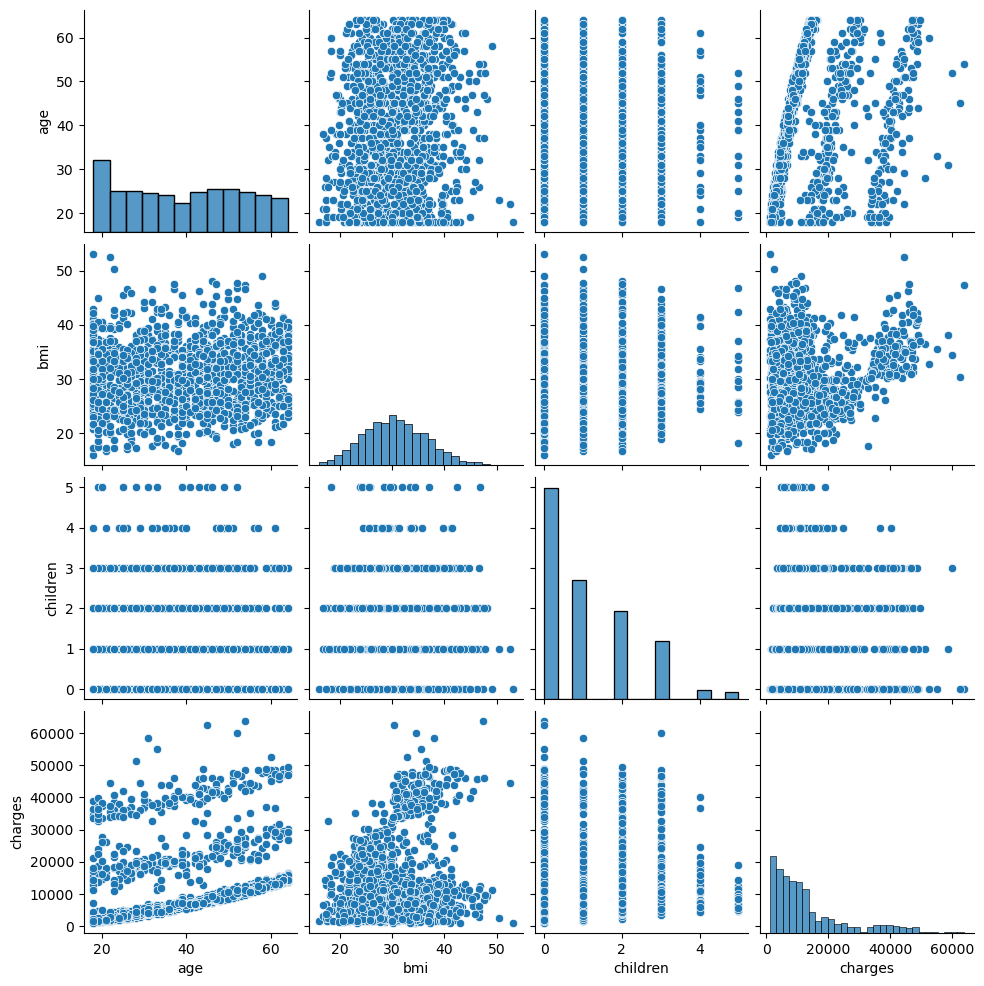

In [7]:
sns.pairplot(df)
plt.show()

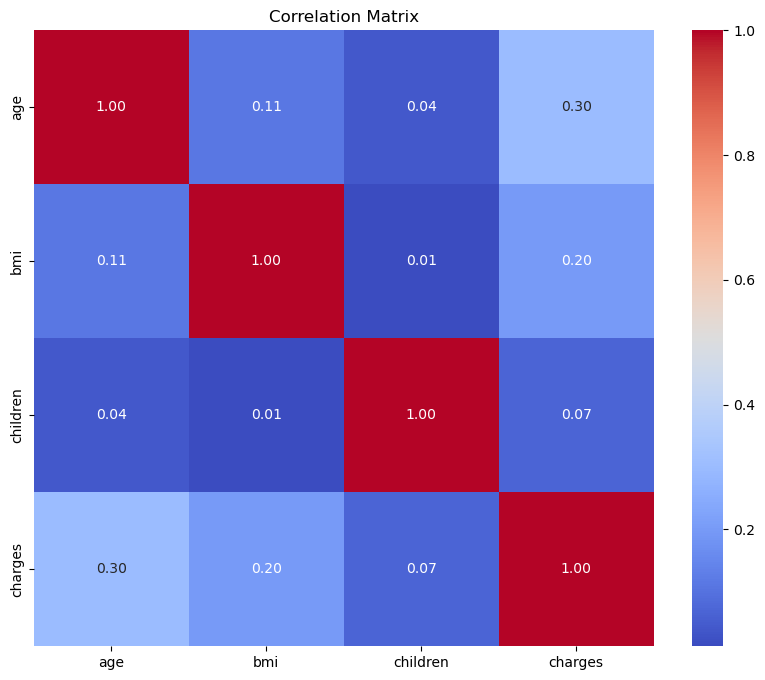

In [8]:
# Correlation matrix heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=['sex', 'smoker', 'region']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Boxplots para atributos numéricos

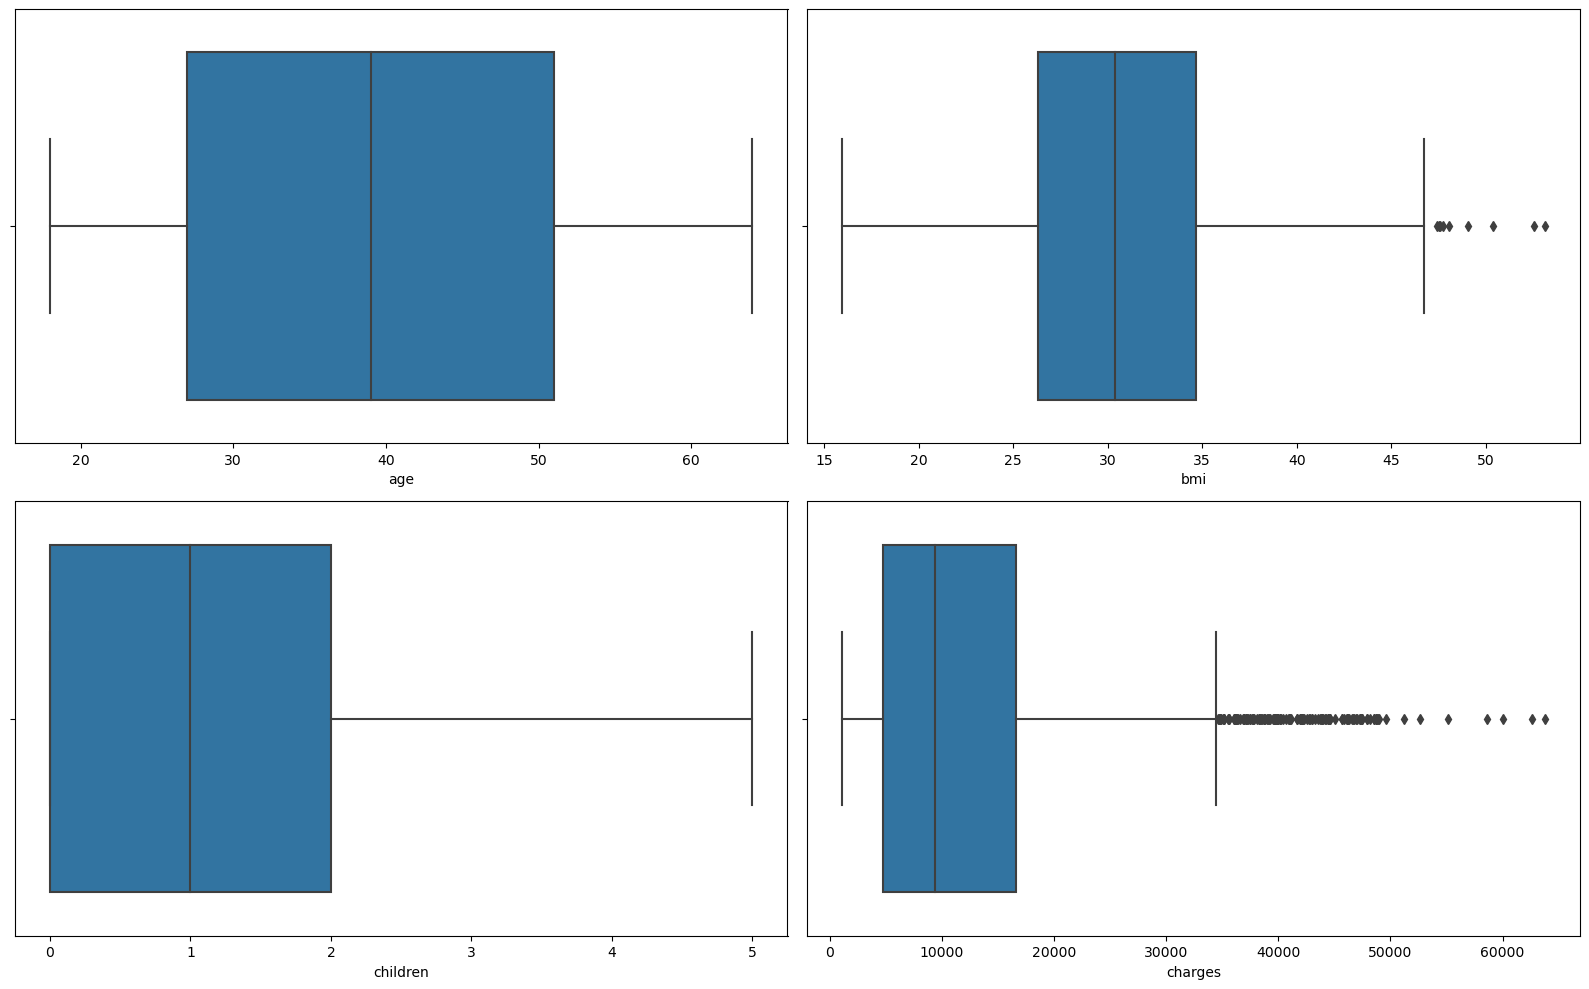

In [9]:
# Create box plots for numerical columns with potential outliers
plt.figure(figsize=(16, 10))

# Box plot for 'age'
plt.subplot(2, 2, 1)
sns.boxplot(x='age', data=df)

# Box plot for 'bmi'
plt.subplot(2, 2, 2)
sns.boxplot(x='bmi', data=df)

# Box plot for 'children'
plt.subplot(2, 2, 3)
sns.boxplot(x='children', data=df)

# Box plot for 'charges'
plt.subplot(2, 2, 4)
sns.boxplot(x='charges', data=df)

plt.tight_layout()
plt.show()


#### Adição de coluna com a categoria do BMI

In [10]:
# Function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Healthy Weight'
    elif 25.0 <= bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

# Apply the function to create a new 'bmi_category' column
df['bmi_category'] = df['bmi'].apply(categorize_bmi)

In [11]:
df

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Healthy Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obesity
1334,18,female,31.920,0,no,northeast,2205.98080,Obesity
1335,18,female,36.850,0,no,southeast,1629.83350,Obesity
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


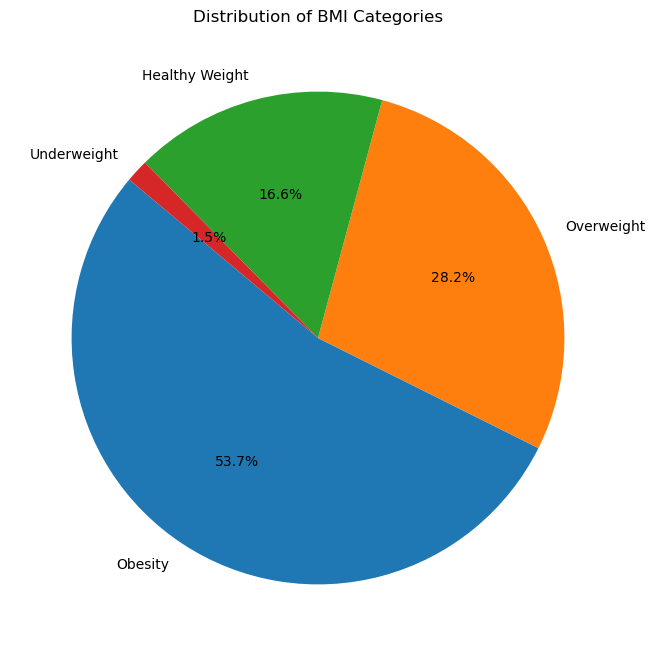

In [12]:
plt.figure(figsize=(8, 8))
explode = (0, 0, 0, 0)  # Explode the first slice (Underweight) for emphasis

# Count the occurrences of each BMI category
bmi_category_counts = df['bmi_category'].value_counts()

# Plot the pie chart
plt.pie(bmi_category_counts, labels=bmi_category_counts.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of BMI Categories')
plt.show()


#### Relação entre diferentes atributos e o Custo do Seguro

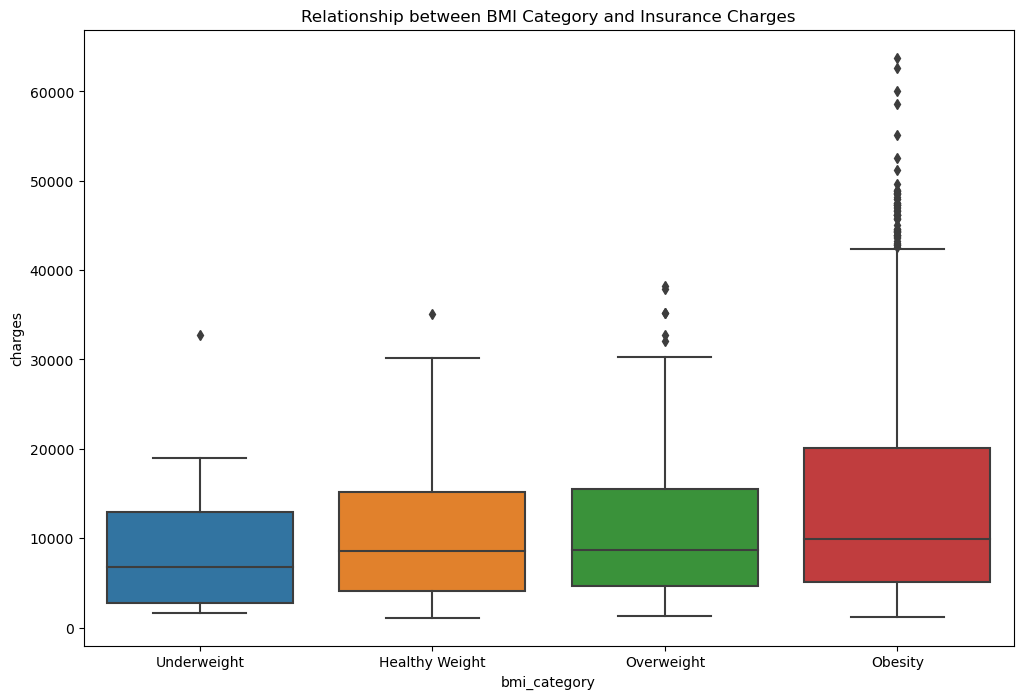

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='bmi_category', y='charges', data=df, order=['Underweight', 'Healthy Weight', 'Overweight', 'Obesity'])
plt.title('Relationship between BMI Category and Insurance Charges')
plt.show()

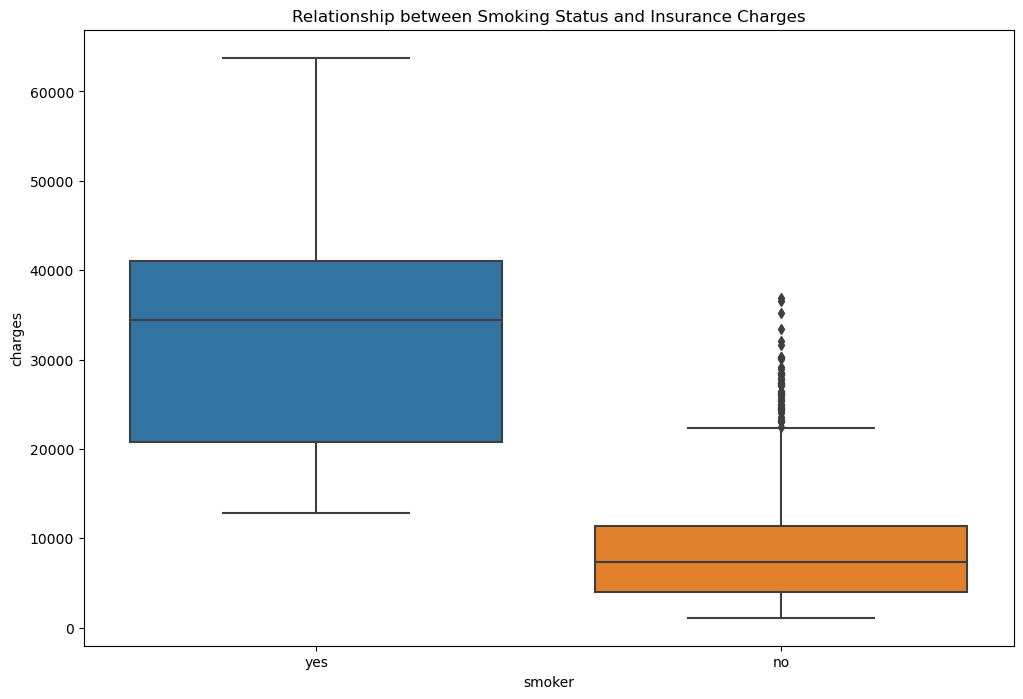

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Relationship between Smoking Status and Insurance Charges')
plt.show()


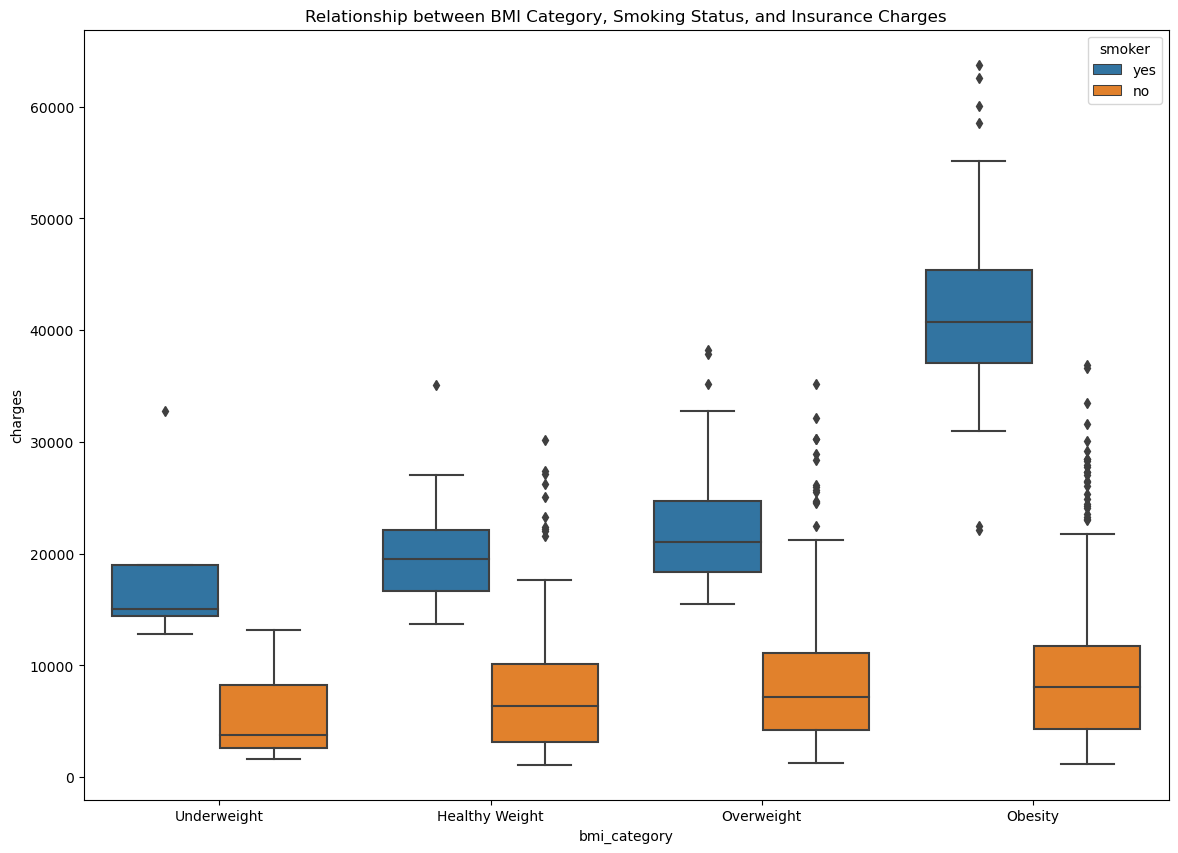

In [15]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='bmi_category', y='charges', hue='smoker', data=df, order=['Underweight', 'Healthy Weight', 'Overweight', 'Obesity'])
plt.title('Relationship between BMI Category, Smoking Status, and Insurance Charges')
plt.show()


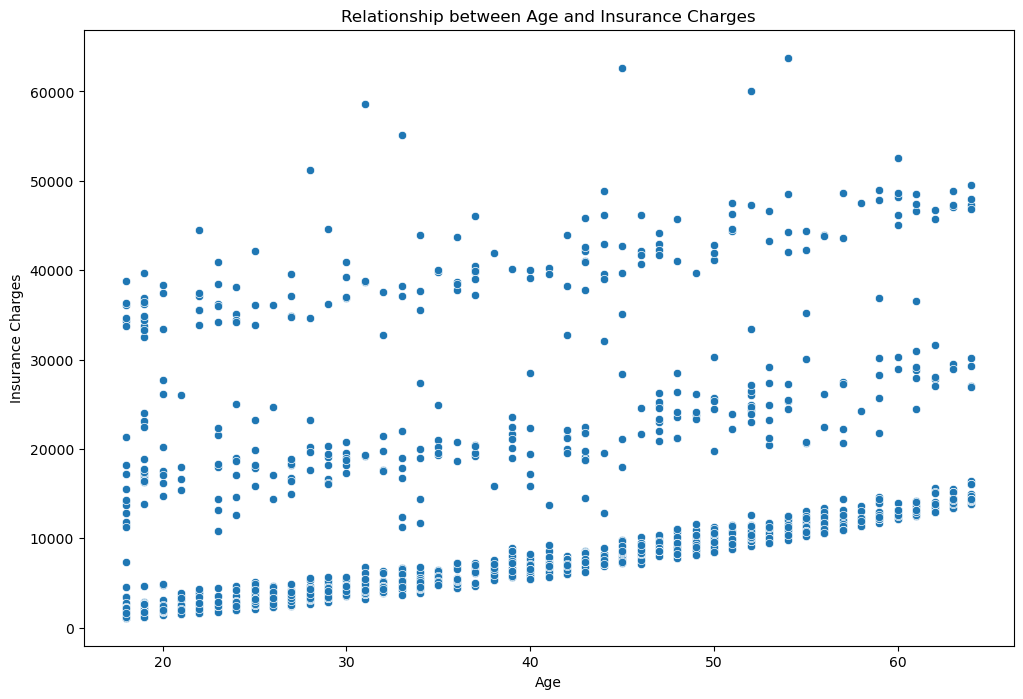

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Relationship between Age and Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()


#### Categorização da Idade

In [17]:
# Function to categorize age into groups
def categorize_age(age):
    if age < 21:
        return 'Children'
    elif 21 <= age < 60:
        return 'Adults'
    else:
        return 'Seniors'

# Apply the function to create a new 'age_group' column
df['age_group'] = df['age'].apply(categorize_age)


#### Relação Idade e Custos do Seguro


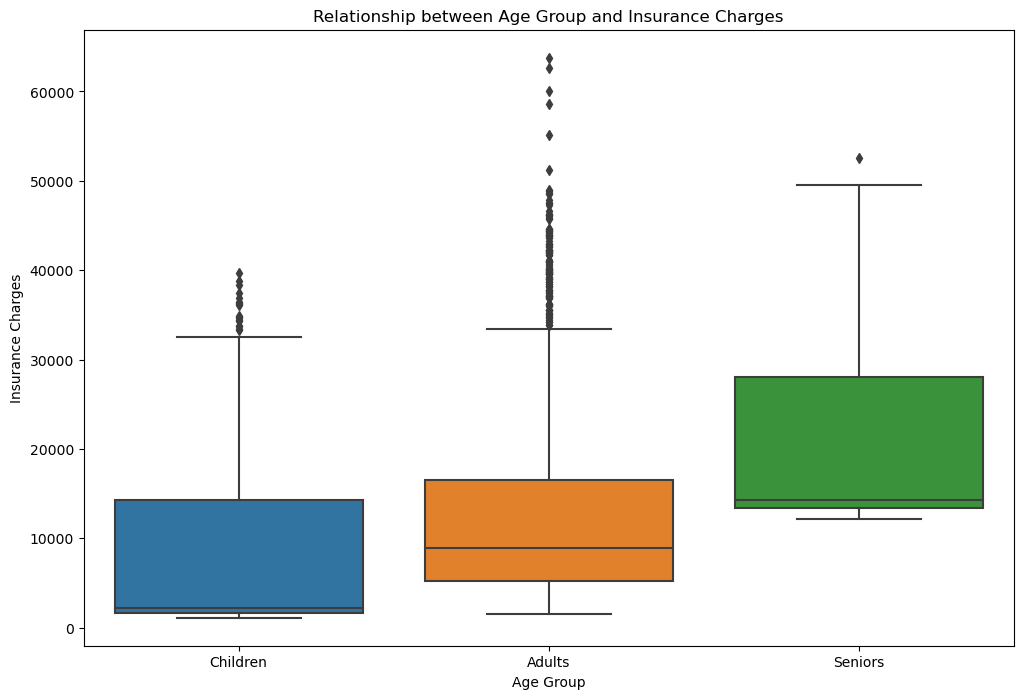

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='age_group', y='charges', data=df, order=['Children', 'Adults', 'Seniors'])
plt.title('Relationship between Age Group and Insurance Charges')
plt.xlabel('Age Group')
plt.ylabel('Insurance Charges')
plt.show()

<Figure size 1400x1000 with 0 Axes>

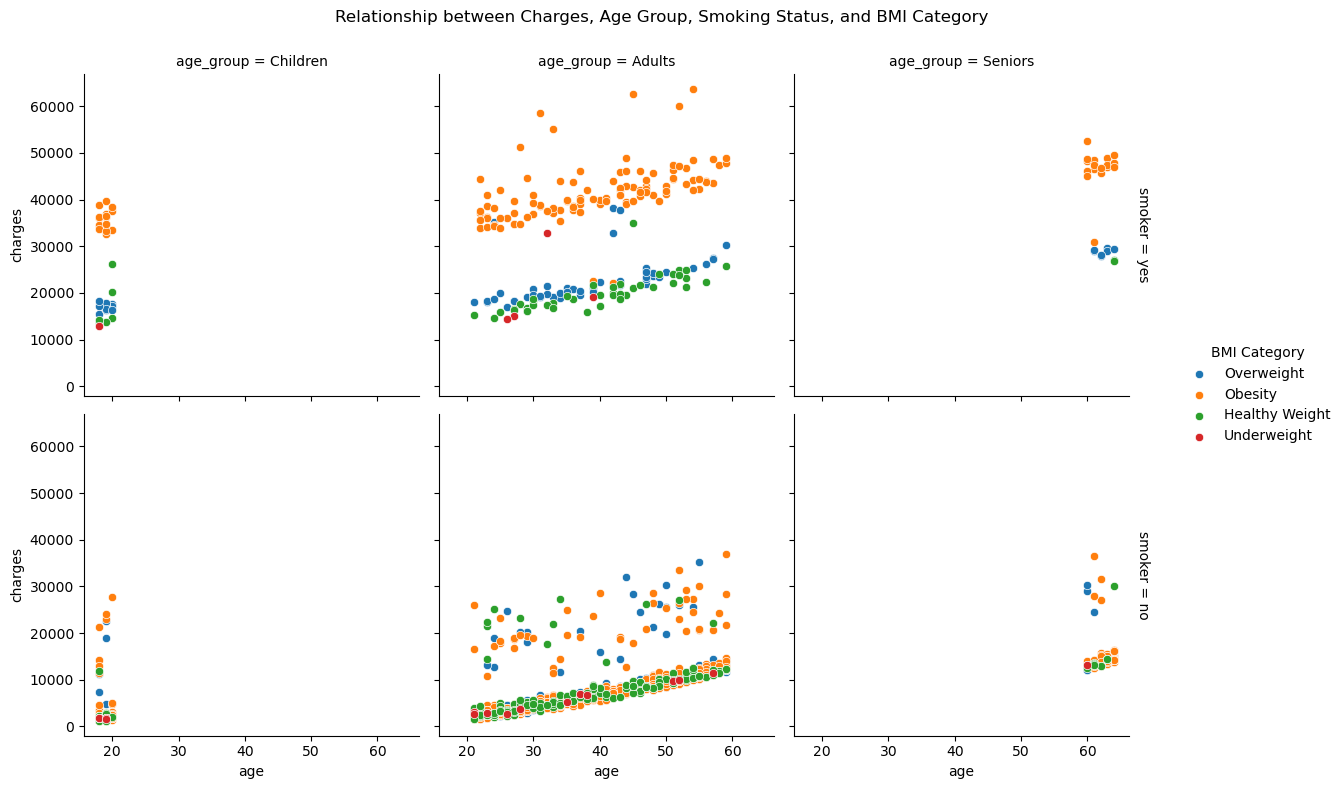

In [19]:
plt.figure(figsize=(14, 10))
g = sns.FacetGrid(df, col='age_group', row='smoker', hue='bmi_category', margin_titles=True, height=4)
g.map(sns.scatterplot, 'age', 'charges')
g.add_legend(title='BMI Category')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Charges, Age Group, Smoking Status, and BMI Category')
plt.show()


<Figure size 1600x1000 with 0 Axes>

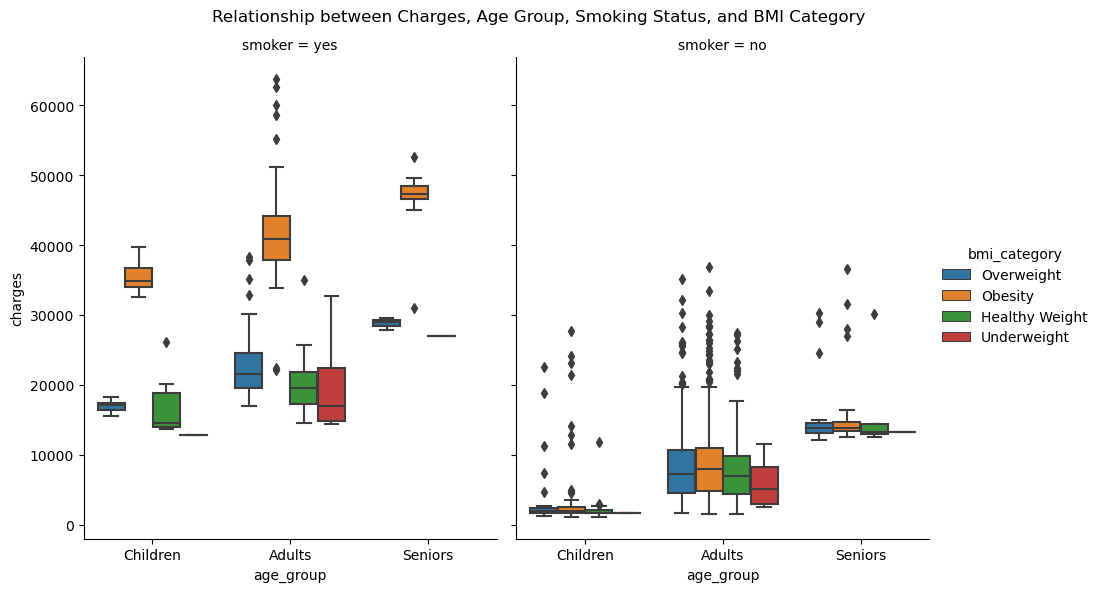

In [20]:
plt.figure(figsize=(16, 10))
sns.catplot(x='age_group', y='charges', hue='bmi_category', col='smoker', data=df, kind='box', height=6, aspect=0.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Relationship between Charges, Age Group, Smoking Status, and BMI Category')
plt.show()


## **3. Data preparation (Preparação dos dados)**

#### Remoção de linhas com valores nulos 

In [21]:
df.dropna(inplace=True)
print(df.isnull().sum())

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
charges         0
bmi_category    0
age_group       0
dtype: int64


#### One-Hot Encoding para região e smoker

In [33]:
# Codificação One-Hot para 'region' e 'smoker'
df_prepared = pd.get_dummies(df, columns=['region', 'smoker'], drop_first=True)
df_prepared.head()


,age,sex,bmi,children,charges,bmi_category,age_group,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,female,27.900,0,16884.92400,Overweight,Children,0,0,1,1
1,18,male,33.770,1,1725.55230,Obesity,Children,0,1,0,0
2,28,male,33.000,3,4449.46200,Obesity,Adults,0,1,0,0
3,33,male,22.705,0,21984.47061,Healthy Weight,Adults,1,0,0,0
4,32,male,28.880,0,3866.85520,Overweight,Adults,1,0,0,0


#### Normalização/Padronização

In [34]:
# Escala Min-Max para 'children'
scaler_minmax = MinMaxScaler()
df_prepared['children'] = scaler_minmax.fit_transform(df_prepared[['children']])

# Padronização para 'age' e 'bmi'
scaler_standard = StandardScaler()
df_prepared[['age', 'bmi']] = scaler_standard.fit_transform(df_prepared[['age', 'bmi']])

# Verificação final
df_prepared.describe()

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,smoker_yes
count,1.338000e+03,1.338000e+03,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,-1.805565e-16,-2.124194e-16,0.218984,13270.422265,0.242900,0.272048,0.242900,0.204783
std,1.000374e+00,1.000374e+00,0.241099,12110.011237,0.428995,0.445181,0.428995,0.403694
min,-1.509965e+00,-2.412011e+00,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,-8.691547e-01,-7.164063e-01,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,-1.474046e-02,-4.320880e-02,0.200000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,8.396738e-01,6.611572e-01,0.400000,16639.912515,0.000000,1.000000,0.000000,0.000000
max,1.765289e+00,3.685522e+00,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


## **4. Modeling (Modelagem)**


1.   Explicar brevemente como você elaborou o modelo para o seus dados.
2.   Se a intenção for fazer uma análise comparativa entre algorimtmos criar células markdown ou comentários explicitando onde começa o código referente a cada algoritmo.
3. Explicar (quando pertinente) o fluxo de dados, ou seja como você organizou os dados em treino e teste, como foi o ajuste de parâmetros e eventuais decisões de projeto referentes a modelagem de dados. **Que ajudem a compreender o código.**

O relatório deverá conter essas informações, mas sob a **perspectiva do projeto de dados**

##**5. Evaluation (Validação)**


**Prevenção de falhas**
(Opcional)


Se o seu dataset for muito grande ou muito grande, ou for muito custoso rodar os algoritmos é indicado que tenha uma célula na qual os resultados parciais possam ser salvos. Evitando, assim ter que re-rodar os algoritmos novamente.